<a href="https://colab.research.google.com/github/Scott-Huston/DS-Unit-2-Applied-Modeling/blob/master/DS_Sprint_Challenge_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_
 
# Applied Modeling Sprint Challenge

To demonstrate mastery on your Sprint Challenge, do all the required, numbered instructions in this notebook.

To earn a score of "3", also do all the stretch goals.

You are permitted and encouraged to do as much data exploration as you want.

### Part 1, Confusion Matrix
- 1.1. Calculate accuracy
- 1.2. Calculate precision
- 1.3. Calculate recall

### Part 2, Log Transformation
- 2.1. Log-transform the target
- 2.2. Plot the target's distribution, before and after the transformation

### Part 3, ROC AUC
- 3.1. Fit classification model
- 3.2. Get ROC AUC score

### Part 4, Model interpretation visualizations
- 4.1. Make _either_ a Partial Dependence Plot _or_ a Shapley Values Force Plot, for either model.

### Stretch Goals
- Get a lower validation error than the example regression model provided in Part 2.
- Find and explain leakage in the classification problem.
- Make _both_ a Partial Dependence Plot _and_ a Shapley Values Force Plot. 


In [1]:
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install packages in Colab
    !pip install --upgrade category_encoders eli5 pandas-profiling pdpbox plotly shap

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.0.0)
Requirement already up-to-date: eli5 in /usr/local/lib/python3.6/dist-packages (0.10.0)
Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.6/dist-packages (2.3.0)
Requirement already up-to-date: pdpbox in /usr/local/lib/python3.6/dist-packages (0.2.0)
Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.1.0)
Requirement already up-to-date: shap in /usr/local/lib/python3.6/dist-packages (0.29.3)


In [0]:
# Check category_encoders version
import category_encoders as ce
from distutils.version import StrictVersion
assert StrictVersion(ce.__version__) >= StrictVersion('2.0.0')

# Part 1, Confusion Matrix

Imagine this is the confusion matrix for a binary classification model. Use the confusion matrix to calculate the model's accuracy, precision, and recall.

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">85</td>
    <td style="border: solid">58</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">8</td>
    <td style="border: solid"> 36</td>
  </tr>
</table>

## 1.1. Calculate accuracy 

In [3]:
# Accuracy = total % of correct predictions
accuracy = (85+36)/(85+58+8+36)
print(accuracy)

0.6470588235294118


## 1.2. Calculate precision

In [4]:
# Precision = % of positive predictions that were correct
precision = 36/(36+58)
print(precision)

0.3829787234042553


## 1.3. Calculate recall

In [5]:
# Recall = % of positive cases that were predicted as positive
recall = 36/(36+8)
print(recall)

0.8181818181818182


# Part 2, Log Transformation

This part uses real-world sales data from a German drugstore chain, from Jan 2, 2013 — July 31, 2015.

There are three dataframes:

- **train**: historical sales data for 120 stores
- **val**: historical sales data for 40 different stores
- **test**: historical sales data for 40 different stores

#### Run this cell to load the data

In [0]:
import pandas as pd
train = pd.read_csv('https://drive.google.com/uc?export=download&id=1YWiyOhY_BiECf-vO8_KrknsHd75HqTfs')
val = pd.read_csv('https://drive.google.com/uc?export=download&id=1Azi1KBv63GdzEn2M0x3eYRvekSaLFnPt')
test = pd.read_csv('https://drive.google.com/uc?export=download&id=1Ab7mg_Vt_bRL7ObiTLPLHbU3sTiVPzc3')
assert train.shape == (94080, 18)
assert val.shape == (31360, 18)
assert test.shape == (31360, 18)

## 2.1. Log-transform the target, for the train, validation, and test sets.

In [0]:
target = 'Sales'
y_train_stores = train[target]
y_val_stores = val[target]
y_test_stores = test[target]

In [0]:
import numpy as np

# Complete this code cell
y_train_log_stores = np.log1p(y_train_stores)
y_val_log_stores = np.log1p(y_val_stores)
y_test_log_stores = np.log1p(y_test_stores)

## 2.2. Plot the distribution of the train set target, before and after the transformation.

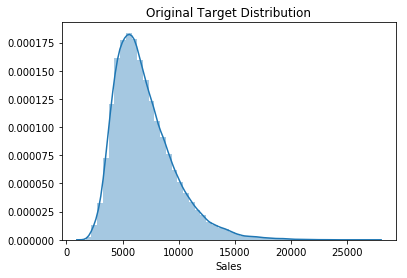

In [9]:
# Plotting distribution of target

import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(y_train_stores);
plt.title('Original Target Distribution')
plt.show()

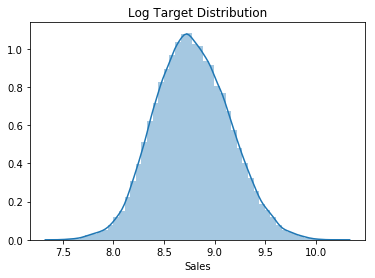

In [10]:
# Plotting distribution of target after taking the log of it
sns.distplot(y_train_log_stores);
plt.title('Log Target Distribution')
plt.show()

## STRETCH GOAL: Get a lower validation error than this example regression model 

Can you improve on this validation error? Make any changes and use any tools or techniques you want.

Data Dictionary:

- **Store** - a unique Id for each store
- **Year**, **Month**, **Day**, **DayOfWeek** - The date, from Jan 2, 2013 — July 31, 2015.
- **Sales** - the units of inventory sold on a given date (this is the target)
- **Customers** - the number of customers on a given date
- **Promo** - indicates whether a store is running a promo on that day
- **SchoolHoliday** - indicates the closure of public schools
- **StoreType** - differentiates between 4 different store models: a, b, c, d
- **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
- **CompetitionDistance** - distance in meters to the nearest competitor store
- **CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
- **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- **Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
- **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

(The train, validation, and test sets do _not_ have different date ranges. But they _do_ have different store ids. This problem is _not_ about forecasting future sales from past sales. This problem is about predicting sales at unknown stores, from sales at known stores.)

In [11]:
import category_encoders as ce
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline

# Assign to X matrix
features = train.columns.drop([target, 'Store'])
X_train_stores = train[features]
X_val_stores = val[features]
X_test_stores = test[features]

# Define a pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)
)

# Fit on train set, with log-transformed target
pipeline.fit(X_train_stores, y_train_log_stores)

# Predict for validation set
y_pred_log_stores = pipeline.predict(X_val_stores)

# Convert prediction's units, from log-sales to sales
y_pred_stores = np.expm1(y_pred_log_stores)

# Get validation mean absolute error
mae = mean_absolute_error(y_val_stores, y_pred_stores)
print(f'Validation Mean Absolute Error: +/− {mae:.0f} sales, on average')

Validation Mean Absolute Error: +/− 858 sales, on average


In [12]:
# Making new model and getting better MAE on validation set

from sklearn.ensemble import GradientBoostingRegressor

pipeline2 = make_pipeline(
    ce.OrdinalEncoder(),
    GradientBoostingRegressor(random_state = 10)
)

pipeline2.fit(X_train_stores, y_train_log_stores)

y_pred_log_stores = pipeline2.predict(X_val_stores)

y_pred_stores = np.expm1(y_pred_log_stores)

mae = mean_absolute_error(y_val_stores,y_pred_stores)
print(f'My new model\'s Validation Mean Absolute Error: +/- {mae:.0f} sales, on average')

My new model's Validation Mean Absolute Error: +/- 719 sales, on average


# Part 3, ROC AUC

For this part, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 2010 to March 2019. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 


#### Your challenge: Predict whether inspections failed.

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to load the data

In [0]:
import pandas as pd
train_total = pd.read_csv('https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5')
test_total  = pd.read_csv('https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a')
assert train_total.shape == (51916, 17)
assert test_total.shape  == (17306, 17)

In [14]:
train_total.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'...",0
4,453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN,0


In [0]:
train = train_total.drop('Violations', axis = 1)
test = test_total.drop('Violations', axis = 1)

In [16]:
y_train = train['Fail']
y_train.head()

0    1
1    0
2    0
3    0
4    0
Name: Fail, dtype: int64

In [17]:
X_train = train.drop('Fail', axis = 1)
X_train.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Latitude,Longitude,Location
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':..."
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'..."
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'..."
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'..."
4,453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,NaN,NaN,NaN


## 3.1. Fit classification model.

You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding.

Fit a model with the train set. Use cross-validation, or use a three-way split (by randomly splitting the train set into train and validation sets).

In [0]:
# Splitting data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size = .8, test_size = .2, stratify = y_train)

In [19]:
# Making pipeline and fitting basic decision tree

!pip install --upgrade category_encoders
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

class_pipeline = make_pipeline(ce.OrdinalEncoder()
              ,IterativeImputer()
              ,RandomForestClassifier())
class_pipeline.fit(X_train, y_train)
print('Accuracy score: ', class_pipeline.score(X_val,y_val))

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.0.0)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score:  0.7356510015408321


## 3.2. Get ROC AUC score. 

Use your model to predict probabilities that food establishments failed inspections.

Get your Validation ROC AUC score. (Multiple times, if you try multiple iterations.)

Get your Test ROC AUC score. (One time, at the end.)

In [20]:
from sklearn.metrics import roc_auc_score

y_pred_proba = class_pipeline.predict_proba(X_val)[:,1]
print('Validation ROC AUC Score: ', roc_auc_score(y_val, y_pred_proba))

y_test = test['Fail']
X_test = test.drop('Fail', axis = 1)

y_pred_proba = class_pipeline.predict_proba(X_test)[:,1]
print('Test ROC AUC Score: ', roc_auc_score(y_test,y_pred_proba))

Validation ROC AUC Score:  0.6578621906204172
Test ROC AUC Score:  0.654592626360129


## STRETCH GOAL: Find and explain leakage

The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections.

You should be able to get an ROC AUC test score > 0.65 without using the feature with leakage.

In [21]:
# There is leakage in the 'Violations' feature.If we're trying to predict 
# whether a place will pass or fail an inspection beforehand, you wouldn't know 
# what violations the inpsection found. If we use the violations feature we 
# would be leaking data from the future into our model. 


# Engineering features to get the violation information
# This is bad practice, just to see how good of a model I could have gotten by 'cheating'

def count_critical_violations(violation):
  violation_string = str(violation)
  count = violation_string.count('CRITICAL VIOLATION')
  return count

def count_serious_violations(violation):
  violation_string = str(violation)
  count = violation_string.count('SERIOUS VIOLATION')
  return count

def count_minor_violations(violation):
  violation_string = str(violation)
  count = violation_string.count('MINOR VIOLATION')
  return count

def get_violations(df):
  df = df.copy()
  df['critical_violation_count'] = df['Violations'].apply(count_critical_violations)
  df['serious_violation_count'] = df['Violations'].apply(count_serious_violations)
  df['minor_violation_count'] = df['Violations'].apply(count_minor_violations)
  return df

train_total = get_violations(train_total)
train_total.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail,critical_violation_count,serious_violation_count,minor_violation_count
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1,2,2,2
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0,0,0,0
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0,0,0,0
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'...",0,0,0,0
4,453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN,0,0,0,0


In [22]:
# Splitting train_total data into training and validation sets and getting accuracy score with the engineered violation information

X_train_cheat, X_val_cheat, y_train, y_val = train_test_split(train_total.drop('Fail', axis = 1), train_total['Fail'], train_size = .8, test_size = .2, stratify = train_total['Fail'])

cheat_class_pipeline = make_pipeline(ce.OrdinalEncoder()
              ,IterativeImputer()
              ,RandomForestClassifier())
cheat_class_pipeline.fit(X_train_cheat, y_train)
print('Accuracy score: ', cheat_class_pipeline.score(X_val_cheat,y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score:  0.8546802773497689


In [23]:
# getting my cheat ROC AUC score
y_pred_proba = cheat_class_pipeline.predict_proba(X_val_cheat)[:,1]
print('Validation ROC AUC Score: ', roc_auc_score(y_val, y_pred_proba))

test_total = get_violations(test_total)
y_test = test_total['Fail']
X_test_cheat = test_total.drop('Fail', axis = 1)

y_pred_proba = cheat_class_pipeline.predict_proba(X_test_cheat)[:,1]
print('Test ROC AUC Score: ', roc_auc_score(y_test,y_pred_proba))

Validation ROC AUC Score:  0.8150487027868623
Test ROC AUC Score:  0.811787992505929


In [24]:
train_total.Violations[0]

'3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATURE REQUIREMENT DURING STORAGE, PREPARATION DISPLAY AND SERVICE - Comments: NOTED INTERNAL TEMPERATURES OF THE FOLLOWING HAZARDOUS FOOD ITEMS ON THE PREP TABLE TO BE IMPROPER:-CHICKEN 58.3F, NOODLES 61.7F/55.4F, EGGS 69.8F. MANAGER IMMEDIATELY AND VOLUNTARILY DISPOSED OF 8 LBS OF PRODUCTS WORTH $40.00  THROUGH DENATURING PROCESS. CRITICAL VIOLATION #7-38-005(A) | 6. HANDS WASHED AND CLEANED, GOOD HYGIENIC PRACTICES; NO BARE HAND CONTACT WITH READY-TO-EAT FOODS. - Comments: NOTED EMPLOYEE WHILE WEARING GLOVES PERFORMED THE FOLLOWING TASKS:- WASHED DISHES AT THE 3 COMPARTMENT SINK AND DID NOT CHANGES THEIR GLOVES, THEN CONTINUED PREPPING AT THE KITCHEN; CLEANED THE MOUTH AND EAR WITH THE SAME GLOVES ON AND CONTINUED AT THE PREP TABLE STILL WITHOUT CHANGING GLOVES OR WASHING HANDS. FINALLY WENT OUTSIDE OF BUILDING AND RETURNED TO THE KITCHEN TO CONTINUE PREPPING STILL WITHOUT CHANGING GLOVES OR WASHING HANDS. CRITICAL VIOLATION #7-38-010(A)  | 

In [25]:
train_total.Violations.describe()

count                                                 42261
unique                                                42164
top       45. FOOD HANDLER REQUIREMENTS MET - Comments: ...
freq                                                      3
Name: Violations, dtype: object

# Part 4

## 4.1. Make _either_ a Partial Dependence Plot _or_ a Shapley Values Force Plot, for either model.

Partial Dependence Plot: 1 feature in isolation or 2 features in interaction.

Shapley Values Force Plot: explain an individual prediction.

In [26]:
# getting Shapley plots
row = X_val_stores.iloc[[0]]
!pip install --upgrade shap
import shap

model = pipeline2.named_steps['gradientboostingregressor']
clean_pipeline = make_pipeline(
                  ce.OrdinalEncoder()
)
clean_pipeline.fit(X_train_stores)

explainer = shap.TreeExplainer(model)
row_processed = clean_pipeline.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value,
    shap_values = shap_values,
    features = row
)

Requirement already up-to-date: shap in /usr/local/lib/python3.6/dist-packages (0.29.3)


## STRETCH GOAL: Make _both_ a Partial Dependence Plot _and_ a Shapley Values Force Plot.

Requirement already up-to-date: pdpbox in /usr/local/lib/python3.6/dist-packages (0.2.0)


([<matplotlib.axis.XTick at 0x7f48bfd13358>,
 <a list of 45 Text xticklabel objects>)

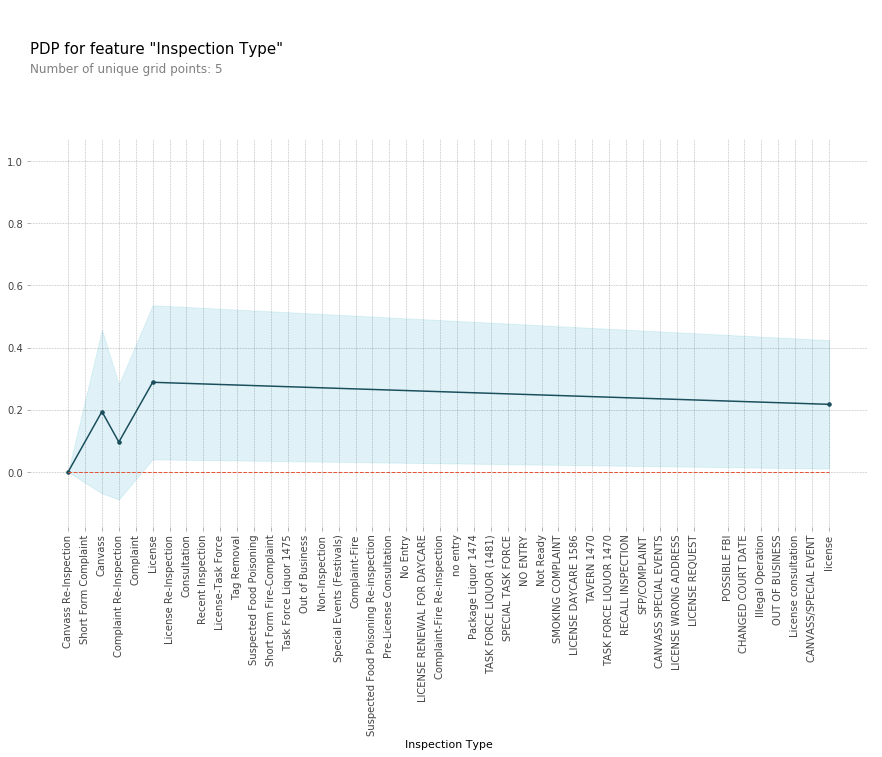

In [27]:
# creating partial dependence plot
!pip install --upgrade pdpbox
from pdpbox import pdp
feature = 'Inspection Type'
model = class_pipeline.named_steps['randomforestclassifier']

class_clean_pipeline = make_pipeline(ce.OrdinalEncoder()
              ,IterativeImputer()
)

X_train_cleaned = class_clean_pipeline.fit_transform(X_train)
X_train_cleaned = pd.DataFrame(X_train_cleaned)
X_train_cleaned.columns = X_train.columns

for item in class_clean_pipeline.named_steps['ordinalencoder'].mapping:
    if item['col'] == feature:
        feature_mapping = item['mapping']

feature_mapping = feature_mapping[feature_mapping.index.dropna()]
category_names = feature_mapping.index.tolist()
category_codes = feature_mapping.values.tolist()

model_features = X_train.columns
pdp_dist = pdp.pdp_isolate(model = model, dataset = X_train_cleaned, model_features = model_features, feature = feature)
pdp.pdp_plot(pdp_dist,feature);

plt.xticks(category_codes, category_names, rotation = 'vertical')



In [28]:
X_train.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Latitude', 'Longitude', 'Location'],
      dtype='object')